In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from optbinning import OptimalBinning

import pickle

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 30)

import sys
import os

PROJECT_DIRECTORY = os.path.join(os.getcwd(), '..')
sys.path.append(PROJECT_DIRECTORY)

from src.utils import * 
from src.selection_methods import *

In [2]:
df_train = pd.read_parquet(PROJECT_DIRECTORY + '/data/processed/df_train.parquet')
df_test = pd.read_parquet(PROJECT_DIRECTORY + '/data/processed/df_test.parquet')

In [3]:
AUX_VAR_PATH     = PROJECT_DIRECTORY + '/models/artefacts/aux_vars.pickle'
TARGET_VARS_PATH = PROJECT_DIRECTORY + '/models/artefacts/target_vars.pickle'
NUM_VARS_PATH    = PROJECT_DIRECTORY + '/models/artefacts/num_vars.pickle'
CAT_VARS_PATH    = PROJECT_DIRECTORY + '/models/artefacts/cat_vars.pickle'

with open(AUX_VAR_PATH,'rb') as f:
    aux_vars = pickle.load(f)

with open(TARGET_VARS_PATH,'rb') as f:
    target_vars = pickle.load(f)

with open(NUM_VARS_PATH,'rb') as f:
    num_vars = pickle.load(f)

with open(CAT_VARS_PATH,'rb') as f:
    cat_vars = pickle.load(f)

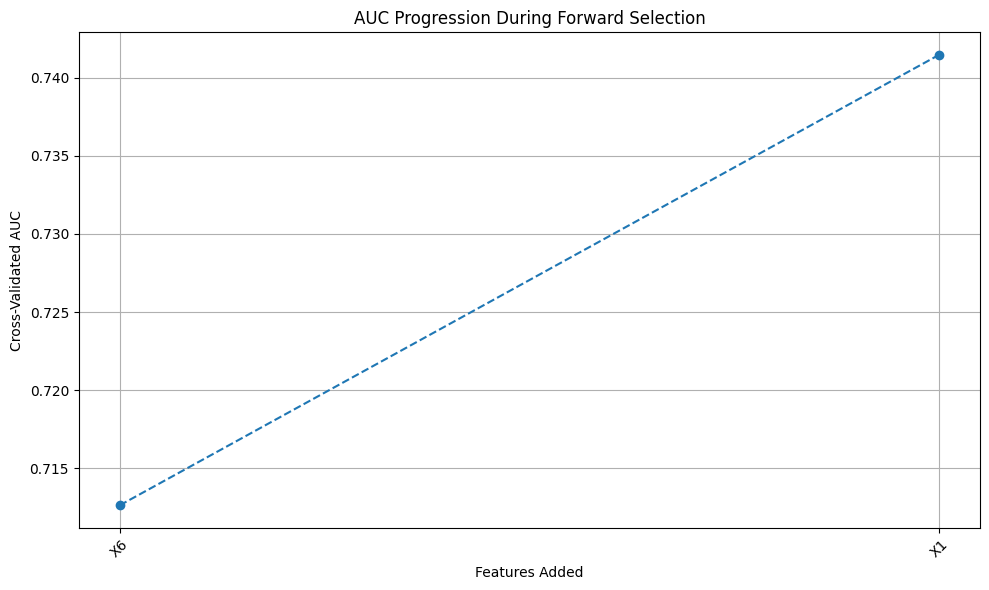

In [4]:
iv_table    = calculate_iv(df_train,num_vars,cat_vars,target_vars[0])
mi_table    = classification_mutual_information(df_train,num_vars,cat_vars,target_vars)
chi2_table  = chi2_dependence(df_train,num_vars,cat_vars,target_vars[0])
testt_table = testt_mann_whitney(df_train,num_vars,target_vars[0],alpha=0.05)
selected_features,auc_history = forward_selection_rf_auc(df_train,[*num_vars,*cat_vars],'Y',verbose=False)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification

# Exemplo: dados sintéticos
X, y = make_classification(n_samples=500, n_features=10, n_informative=5, random_state=42)
X = pd.DataFrame(X, columns=[f'X{i}' for i in range(1, 11)])

# Função para executar a eliminação reversa com random forest + CV
def backward_elimination_rf(X, y, cv=5, scoring='roc_auc', verbose=True):
    remaining_features = list(X.columns)
    best_score = 0
    history = []

    while len(remaining_features) > 1:
        rf = RandomForestClassifier(random_state=42,n_jobs=-1)
        scores = cross_val_score(rf, X[remaining_features], y, cv=cv, scoring=scoring)
        avg_score = np.mean(scores)
        history.append((remaining_features.copy(), avg_score))

        if verbose:
            print(f"Features: {remaining_features} | Score: {avg_score:.4f}")

        rf.fit(X[remaining_features], y)
        importances = pd.Series(rf.feature_importances_, index=remaining_features)
        least_important = importances.idxmin()

        remaining_features.remove(least_important)

    return history

In [8]:
X = df_train[[*num_vars,*cat_vars]]
y = df_train['Y']

result = backward_elimination_rf(X, y)

Features: ['X1', 'X5', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X2', 'X3', 'X4', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11'] | Score: 0.7657
Features: ['X1', 'X5', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X3', 'X4', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11'] | Score: 0.7620
Features: ['X1', 'X5', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X3', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11'] | Score: 0.7640
Features: ['X1', 'X5', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X3', 'X6', 'X7', 'X8', 'X9', 'X10'] | Score: 0.7617
Features: ['X1', 'X5', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X6', 'X7', 'X8', 'X9', 'X10'] | Score: 0.7593
Features: ['X1', 'X5', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X6', 'X7', 'X8', 'X9'] | Score: 0.7587
Features: ['X1', 'X5